In [16]:
### Gene usage analysis ###
# wt

# Quantifying the VDJ gene based on either sequence count or clonotypes.
# options are based on "gene", "allele", "family"
# duplicate count does not work... missing the column. 

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

require(data.table)
db <- as.data.frame(fread("/home/phil/processed_docker/a_r_vac_wt/changeo_10x/r_vac_wt_groups_contig_light_productive-T.tsv"))

In [17]:
# Quantify usage at the gene level.
# Printing the first 4 genes.
gene <- countGenes(db, groups="sample_id", gene="v_call", mode="gene")
head(gene, n=10)

sample_id,gene,seq_count,seq_freq
<chr>,<chr>,<int>,<dbl>
Control,IGKV10-96,306,0.05032895
Control,IGKV1-135,242,0.03980263
Control,IGKV1-117,237,0.03898026
Control,IGLV1,233,0.03832237
Control,IGKV6-15,213,0.03503289
Control,IGKV1-110,200,0.03289474
Vaccinated-only,IGLV1,180,0.04597701
Vaccinated-only,IGKV1-117,176,0.04495530
Control,IGKV14-111,172,0.02828947


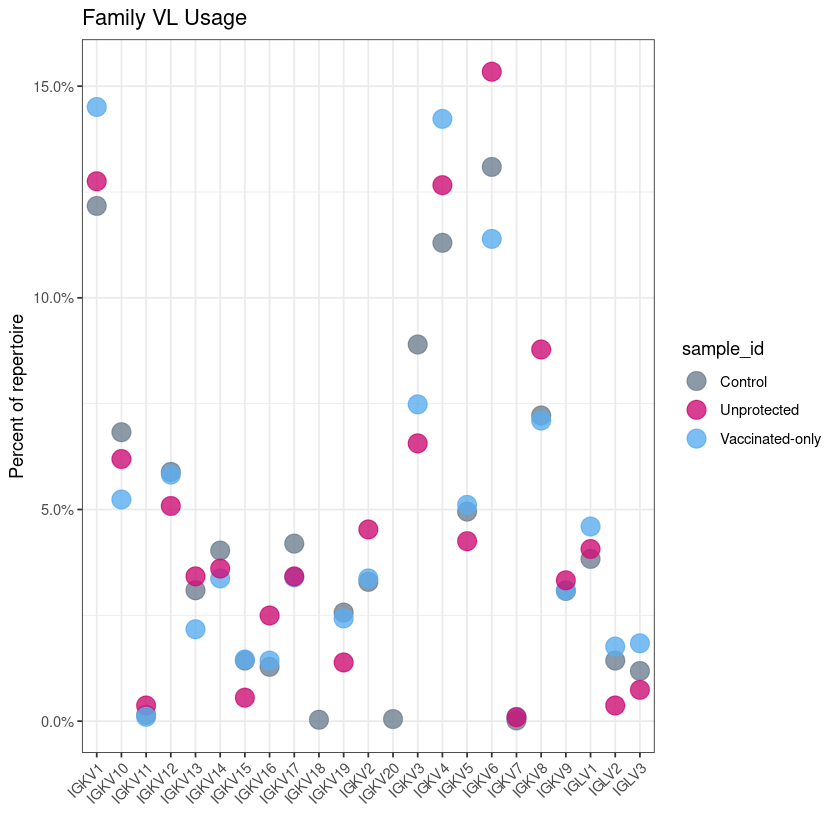

In [18]:
# manual color codes
sample_colors <- c("Unprotected"="deeppink3", "Vaccinated-only"="steelblue2", "Control"="slategrey")

# Quantify V gene based on the family.
family_v <- countGenes(db, gene="v_call", groups="sample_id", mode="family")

# Plot V family usage by sample
g2 <- ggplot(family_v, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("Family VL Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g2)

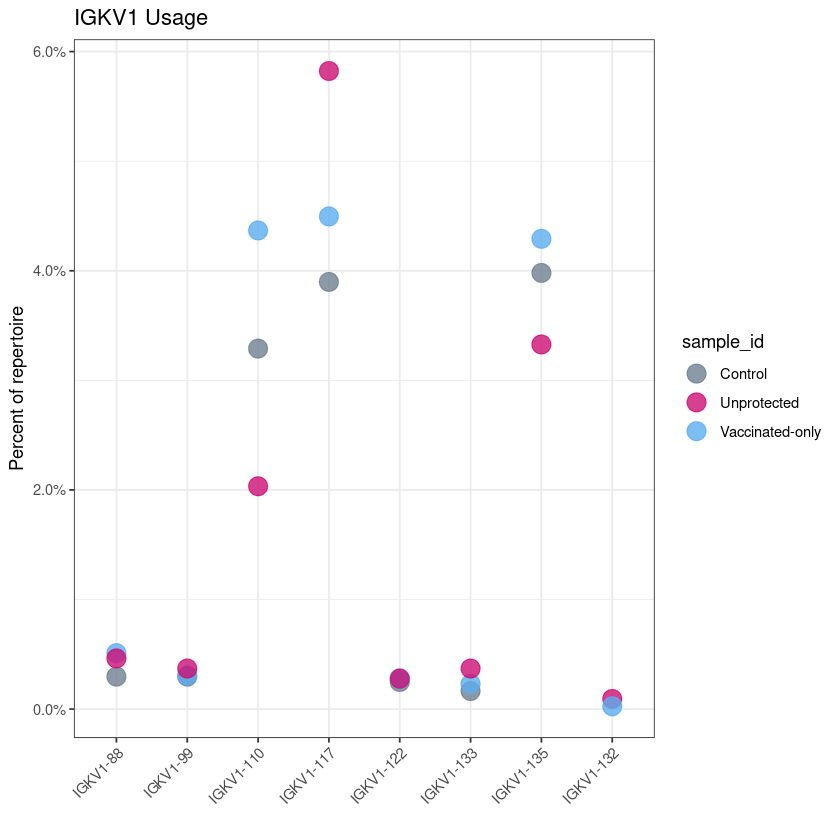

In [19]:
# Assign sorted levels and subset to IGHV1
igkv1 <- gene %>%
    mutate(gene=factor(gene, levels=sortGenes(unique(gene), method="name"))) %>%
    filter(getFamily(gene) == "IGKV1")

# Plot V gene usage in the IGHV1 family by sample
g1 <- ggplot(igkv1, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("IGKV1 Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g1)

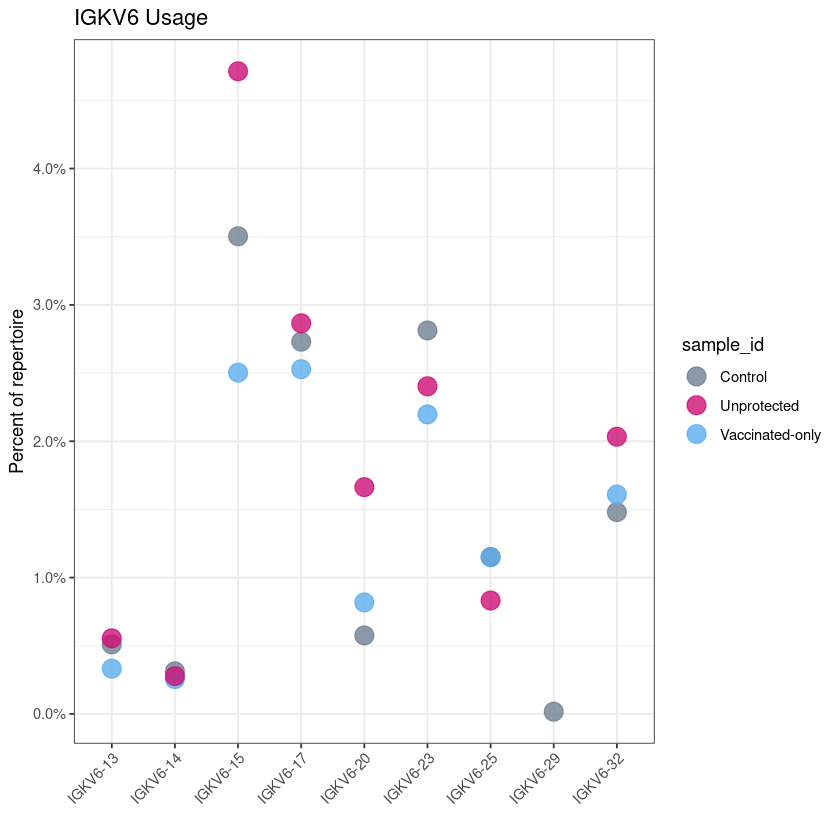

In [20]:
# Assign sorted levels and subset to IGHV1
igkv6 <- gene %>%
    mutate(gene=factor(gene, levels=sortGenes(unique(gene), method="name"))) %>%
    filter(getFamily(gene) == "IGKV6")

# Plot V gene usage in the IGHV1 family by sample
g1 <- ggplot(igkv6, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("IGKV6 Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g1)

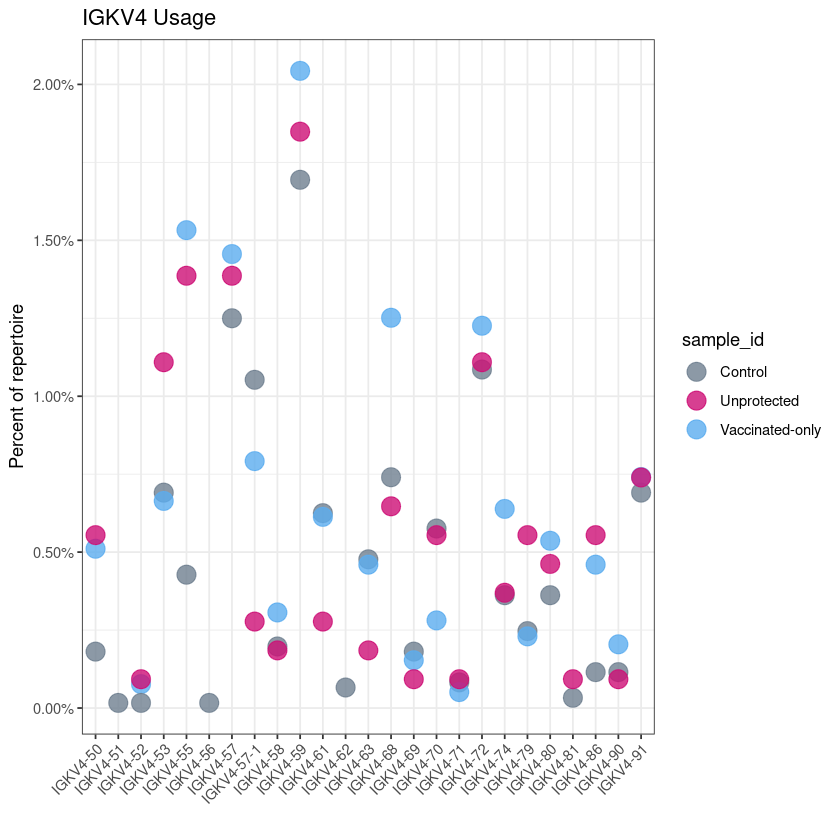

In [21]:
# Assign sorted levels and subset to IGHV1
igkv4 <- gene %>%
    mutate(gene=factor(gene, levels=sortGenes(unique(gene), method="name"))) %>%
    filter(getFamily(gene) == "IGKV4")

# Plot V gene usage in the IGHV1 family by sample
g1 <- ggplot(igkv4, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("IGKV4 Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g1)

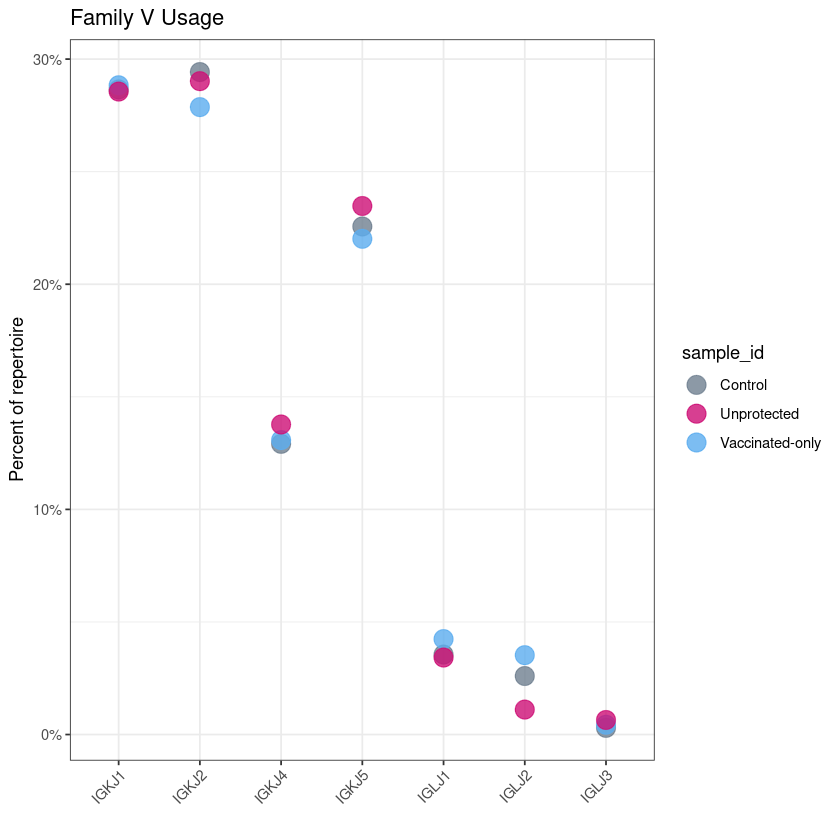

In [22]:
# Quantify V gene based on the family.
family_j <- countGenes(db, gene="j_call", groups="sample_id", mode="family")

# Plot V family usage by sample
g2 <- ggplot(family_j, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("Family V Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g2)

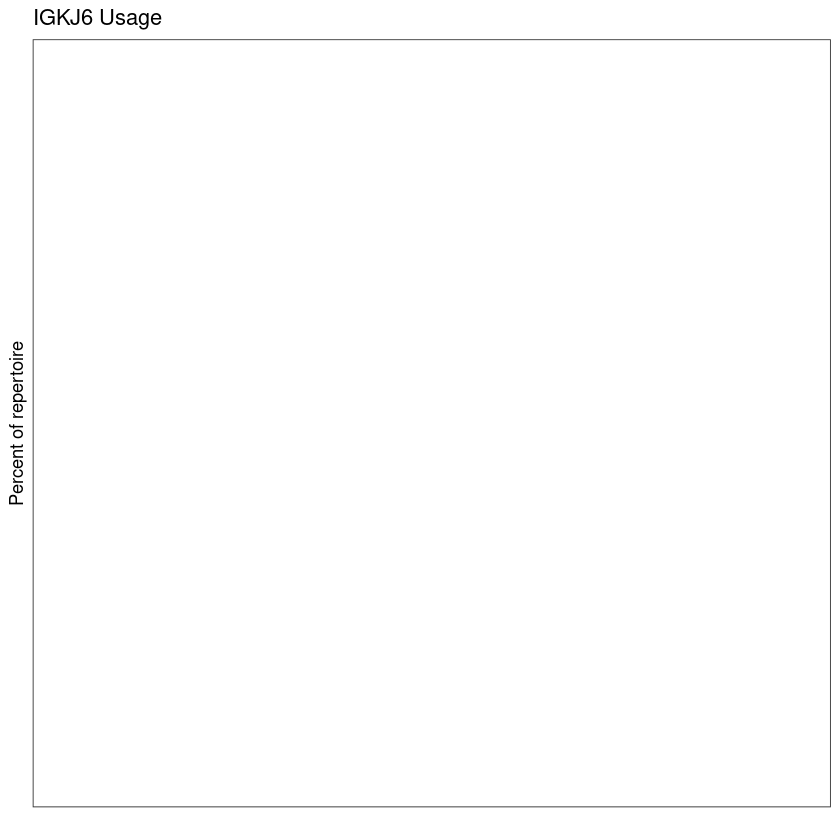

In [23]:
# Assign sorted levels and subset to IGHV1
igkv6 <- gene %>%
    mutate(gene=factor(gene, levels=sortGenes(unique(gene), method="name"))) %>%
    filter(getFamily(gene) == "IGKJ1")

# Plot V gene usage in the IGHV1 family by sample
g1 <- ggplot(igkv6, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("IGKJ6 Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(aes(color=sample_id), size=5, alpha=0.8)
plot(g1)

In [24]:
# Summary

# 1. Without copy numbers
genes_clone_family <- countGenes(db, gene="v_call", mode="family")
genes_gene <- countGenes(db, gene="v_call", mode="gene")
genes_allele <- countGenes(db, gene="v_call", mode="allele")

glimpse(db)

Rows: 11,077
Columns: 58
$ sample_id          <chr> "Unprotected", "Unprotected", "Unprotected", "Unpr…
$ sequence_id        <chr> "AAACCTGAGCCGTCGT-1_contig_1", "AAACCTGCAAAGGTGC-1…
$ sequence           <chr> "ACACAGTTGTTTTAAAGAGATGCACTTATAGGAAGAGCAATAATTAGTC…
$ rev_comp           <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ productive         <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T", "T", …
$ v_call             <chr> "IGKV4-53*01", "IGKV1-135*01", "IGKV13-84*01", "IG…
$ d_call             <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ j_call             <chr> "IGKJ2*01", "IGKJ2*01", "IGKJ1*01", "IGKJ2*01", "I…
$ sequence_alignment <chr> "GAAATTGTGCTCACCCAGTCTCCAGCACTCATGGCTGCATCTCCAGGGG…
$ germline_alignment <chr> "GAAATTGTGCTCACCCAGTCTCCAGCACTCATGGCTGCATCTCCAGGGG…
$ junction           <chr> "TGTCAACAGTGGAGTAGTTACCCACTCACGTTC", "TGCTGGCAAGGT…
$ junction_aa        <chr> "CQQWSSYPLTF", "CWQGTHFPYTF", "CQQYWSTTWTF", "CQQY…
$ v_cigar            <chr> 

ERROR: Error: Faceting variables must have at least one value


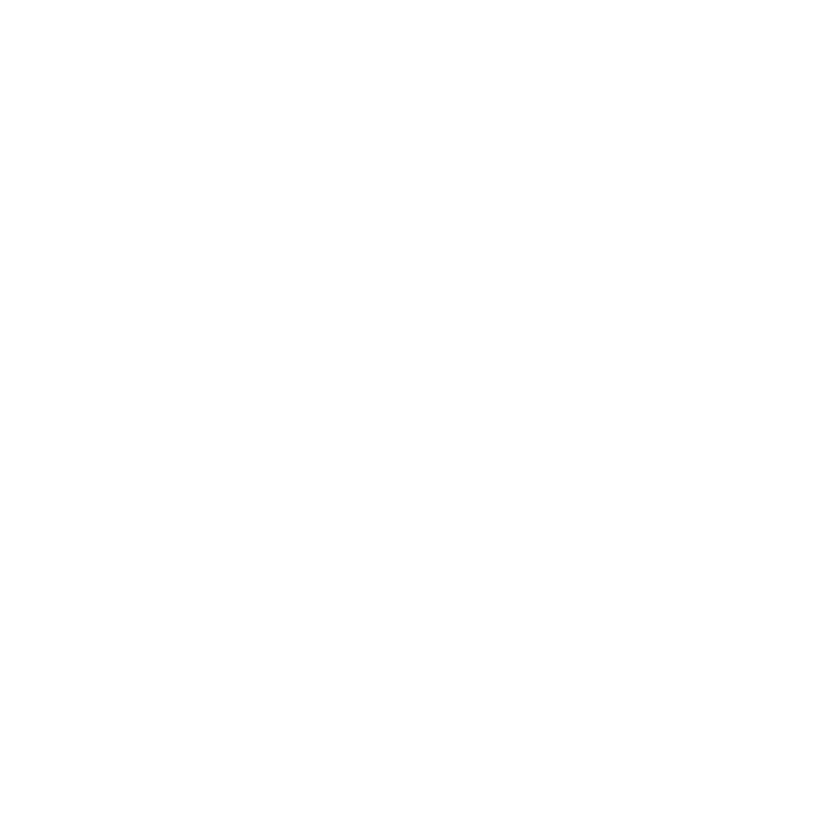

In [25]:
#2. With copy numbers based on clone
genes_clone_family <- countGenes(db, gene="v_call", groups = c("c_call"), clone = "locus", mode="family")

genes_clone_family <- filter(genes_clone_family, c_call %in% c("IGKV", "IGKL"))

g_clone_family <- ggplot(genes_clone_family, aes(x=gene, y=clone_freq)) +
    theme_bw() +
    ggtitle("Clonal Usage") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Percent of repertoire") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_brewer(palette="Set1") +
    geom_point(size=5, alpha=0.8) +
    facet_grid(. ~ c_call)
plot(g_clone_family)

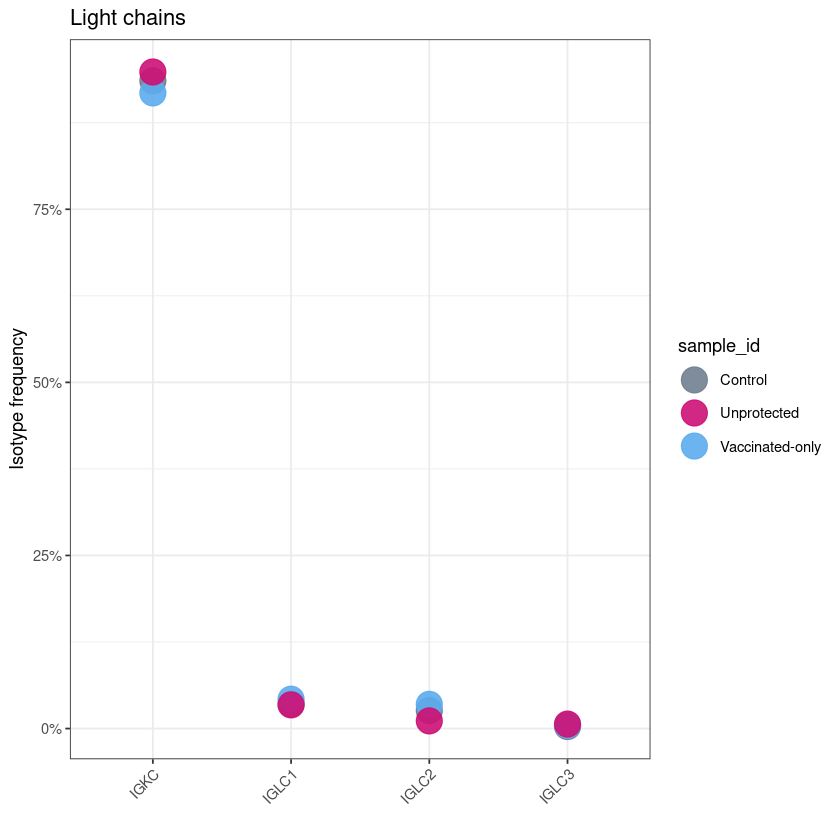

In [26]:
# Quantify V gene based on the family.
family_c <- countGenes(db, gene="c_call", groups="sample_id", mode="family")

# Plot V family usage by sample
g2 <- ggplot(family_c, aes(x=gene, y=seq_freq)) +
    theme_bw() +
    ggtitle("Light chains") +
    theme(axis.text.x=element_text(angle=45, hjust=1, vjust=1)) +
    ylab("Isotype frequency") +
    xlab("") +
    scale_y_continuous(labels=percent) +
    scale_color_manual(values=sample_colors) +
    geom_point(aes(color=sample_id), size=7, alpha=0.9)
plot(g2)